In [3]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the original image
image_path = "test2222.jpg"
image = Image.open(image_path)

# Convert the image to grayscale
image_gray = image.convert('L')

# Convert to numpy array
image_array = np.array(image_gray)

# Define a filter (kernel) for edge detection
filter_kernel = np.array([[-1, -1, -1],
                          [-1,  8, -1],
                          [-1, -1, -1]])

# Apply convolution using cv2.filter2D
stride = 1  # Define the stride
padding = 'same'  # Define the padding type ('same' for keeping dimensions)

# Calculate padding width
pad_size = filter_kernel.shape[0] // 2

# Apply padding to the image
if padding == 'same':
    image_padded = np.pad(image_array, pad_size, mode='constant', constant_values=0)
else:
    image_padded = image_array

# Get dimensions of the padded image
height, width = image_padded.shape

# Initialize the output array
output_height = (height - filter_kernel.shape[0]) // stride + 1
output_width = (width - filter_kernel.shape[1]) // stride + 1
output_array = np.zeros((output_height, output_width))

# Perform convolution operation
for i in range(0, height - filter_kernel.shape[0] + 1, stride):
    for j in range(0, width - filter_kernel.shape[1] + 1, stride):
        region = image_padded[i:i + filter_kernel.shape[0], j:j + filter_kernel.shape[1]]
        output_array[i // stride, j // stride] = np.sum(region * filter_kernel)

# Clip values to range 0-255 and convert to uint8
output_array = np.clip(output_array, 0, 255).astype(np.uint8)

# Convert to PIL image for visualization
output_image = Image.fromarray(output_array)

# Save the processed image
convolved_image_path = "test3.jpg"
output_image.save(convolved_image_path)

(convolved_image_path)


'test3.jpg'

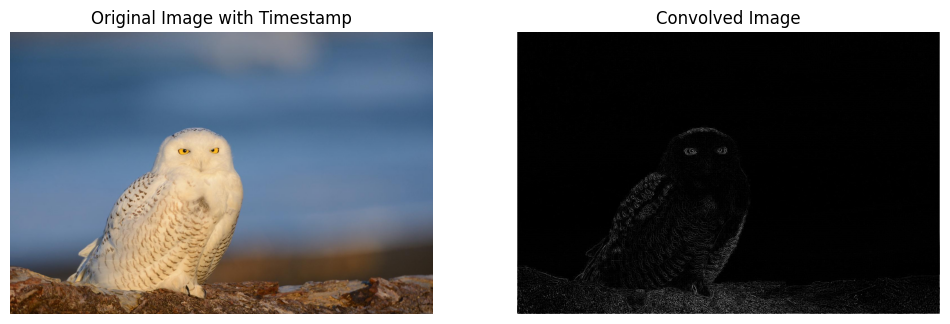

In [4]:
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.title("Original Image with Timestamp")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Convolved image
plt.subplot(1, 2, 2)
plt.title("Convolved Image")
plt.imshow(output_image, cmap='gray')
plt.axis('off')

plt.show()